### Setup & Necessary Libraries ###

The libraries listed below are imported to enable data manipulation, visualization, and numerical computations.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
import plotly.express as px
from matplotlib.ticker import MultipleLocator, FuncFormatter

### Data Importing & Preparation ###

Below are the datasets containing the raw data from their respective data hubs. (rows were skipped to omit unnecessary data that could interfere with analysis)
Here, the datasets are loaded into the notebook. 
The columns from the different datasets that have the same name are renamed to represent their respective datasets and then saved as a new DataFrame.
The last dataset is commented out as it is not currently being used, but remains more readily available for further analysis involving county classification regarding urbanization.

-- "....head("")" is used throughout the notebook. This is used to display the data in the specified DataFrame.

In [189]:
df_ky_income = pd.read_csv("../data/HDPulse_data_income.csv", skiprows=4)
df_renamed_inc = df_ky_income.rename(columns={'Rank within US (of 3141 counties)': 'Median Household Income Rank Within US (of 3141 counties)'}, inplace=False)

df_renamed_inc.head(130)

df_ky_education = pd.read_csv("../data/HDPulse_data_education.csv", skiprows=5)
df_renamed_edu = df_ky_education.rename(columns={'Rank within US (of 3143 counties)': "Education Rank Within US (of 3141 counties)"}, inplace=False)

df_renamed_edu.head(130)

df_income_allstates_inc = pd.read_csv("../data/HDPulse_data_income_allstates.csv", skiprows=4)
df_renamed_allstates_inc = df_income_allstates_inc.rename(columns={"Value (Dollars)": "Median Household Income (Dollars)"}, inplace=False)

df_renamed_allstates_inc.head(60)

df_education_allstates = pd.read_csv("../data/HDPulse_data_education_allstates.csv", skiprows=5)
df_renamed_allstates_edu = df_education_allstates.rename(columns={"Value (Percent)": "People (Education: At Least Bachelor's Degree) %"}, inplace=False)

df_renamed_allstates_edu.head(60)


# df_rucc = pd.read_csv("../data/rucc_codes_2023.csv", encoding='latin1')
# df_rucc['FIPS'] = df_rucc['FIPS'].astype(str).str.zfill(5)
# df_rucc.head(100)

,State,FIPS,People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Rank within US (of 52 states)
0,United States,0.0,35.0,79954302.0,NaN
1,West Virginia,54000.0,23.3,295541.0,52.0
2,Mississippi,28000.0,24.2,475997.0,51.0
3,Arkansas,5000.0,25.1,513221.0,50.0
4,Louisiana,22000.0,26.6,825794.0,49.0
5,Kentucky,21000.0,27.0,830856.0,48.0
6,Nevada,32000.0,27.4,601393.0,47.0
7,Alabama,1000.0,27.8,957081.0,45.0
8,Oklahoma,40000.0,27.8,733793.0,45.0
9,Indiana,18000.0,28.8,1313086.0,44.0


### Data Merging ###

The income and education datasets for Kentucky counties are combined into a single DataFrame.

In [190]:
merged_df_ky = pd.merge(df_renamed_inc, df_renamed_edu, on="County", how="outer") # 'outer' ensures all counties from both datasets are included (not an issue in this instance)

merged_df_ky.head(130)

,County,FIPS_x,Value (Dollars),Median Household Income Rank Within US (of 3141 counties),FIPS_y,Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,Adair County,21001.0,"50,316","2,664",21001.0,18.8,2402.0,"2,043"
1,Allen County,21003.0,"59,029","2,016",21003.0,17.4,2546.0,"2,295"
2,Anderson County,21005.0,"71,747",917,21005.0,25.7,4290.0,"1,028"
3,Ballard County,21007.0,"64,740","1,468",21007.0,18.7,1028.0,"2,064"
4,Barren County,21009.0,"49,171","2,736",21009.0,17.8,5497.0,"2,228"
...,...,...,...,...,...,...,...,...
125,Wayne County,21231.0,"41,933","3,006",21231.0,13.7,1931.0,"2,830"
126,Webster County,21233.0,"58,786","2,049",21233.0,12.6,1099.0,"2,944"
127,Whitley County,21235.0,"41,719","3,015",21235.0,19.8,4580.0,"1,871"
128,Wolfe County,21237.0,"29,052","3,136",21237.0,7.4,333.0,"3,133"


### Data Cleaning ###

The following steps were performed to perpare the newly merged dataset for further analysis and visualization:

Rows for `United States` and `Kentucky` are moved to the top of the dataset for appropriate reference and separation from the other rows, as they are not actual counties.
The `FIPS_y` column (from the education dataset) is removed because it was an exact duplicate to the `FIPS_x` column (from the income dataset).
The `FIPS_x` is renamed to `FIPS (Federal Information Processing Standards)` to show actual meaning of the acronym `FIPS`.

In [191]:
row_us = merged_df_ky[merged_df_ky['County'] == 'United States']  # selects row where 'County' column = 'United States' and stores that in 'row_us'

row_ky = merged_df_ky[merged_df_ky['County'] == 'Kentucky']

remaining = merged_df_ky[
    (merged_df_ky['County'] != 'United States') & 
    (merged_df_ky['County'] != 'Kentucky')
]  # selects all rows that are not specified and stores them in 'remaining'

merged_df_reordered = pd.concat([row_us, row_ky, remaining], ignore_index=True)  # combines the 3 dfs vertically in the order listed  # ignore_index=True resets the row indices to keep consistent counting numbers

merged_df_reordered = merged_df_reordered.drop(columns=['FIPS_y'])

merged_df_reordered.rename(columns={'FIPS_x': "FIPS (Federal Information Processing Standards)"}, inplace=True)  # inplace=True modifies the DataFrame directly instead of returning a new DataFrame

merged_df_reordered.head(130)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0.0,"78,538",NaN,35.0,79954302.0,NaN
1,Kentucky,21000.0,"62,417",45 of 52,27.0,830856.0,48 of 52
2,Adair County,21001.0,"50,316","2,664",18.8,2402.0,"2,043"
3,Allen County,21003.0,"59,029","2,016",17.4,2546.0,"2,295"
4,Anderson County,21005.0,"71,747",917,25.7,4290.0,"1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231.0,"41,933","3,006",13.7,1931.0,"2,830"
126,Webster County,21233.0,"58,786","2,049",12.6,1099.0,"2,944"
127,Whitley County,21235.0,"41,719","3,015",19.8,4580.0,"1,871"
128,Wolfe County,21237.0,"29,052","3,136",7.4,333.0,"3,133"


### Removing Unnecessary Rows ###

The rows containing metadata, notes, or references as opposed to county data are filtered out and removed by using `string-matching`.
The strings are separated by the `|` operator.

In [192]:
merged_df_reordered = merged_df_reordered[
    ~merged_df_reordered['County'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]  # filter and remove unnecessary data

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0.0,"78,538",NaN,35.0,79954302.0,NaN
1,Kentucky,21000.0,"62,417",45 of 52,27.0,830856.0,48 of 52
2,Adair County,21001.0,"50,316","2,664",18.8,2402.0,"2,043"
3,Allen County,21003.0,"59,029","2,016",17.4,2546.0,"2,295"
4,Anderson County,21005.0,"71,747",917,25.7,4290.0,"1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231.0,"41,933","3,006",13.7,1931.0,"2,830"
126,Webster County,21233.0,"58,786","2,049",12.6,1099.0,"2,944"
127,Whitley County,21235.0,"41,719","3,015",19.8,4580.0,"1,871"
128,Wolfe County,21237.0,"29,052","3,136",7.4,333.0,"3,133"


### Conversions ###

The column `People (Education: At Least Bachelor's Degree)` is being converted to numeric values and rounded to integers.
The numbers are then formatted with commas for improved readability and enchanced visualization.

In [193]:
merged_df_reordered["People (Education: At Least Bachelor's Degree)"] = merged_df_reordered["People (Education: At Least Bachelor's Degree)"].astype(float).astype(int)

merged_df_reordered["People (Education: At Least Bachelor's Degree)"] = \
    merged_df_reordered["People (Education: At Least Bachelor's Degree)"].apply(lambda x: f"{int(x):,}")

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0.0,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000.0,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001.0,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003.0,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005.0,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231.0,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233.0,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235.0,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237.0,"29,052","3,136",7.4,333,"3,133"


### Continued Conversions ###

The `Value (Percent)` column is converted to a string for formatting purposes of adding a '%' sign.

In [194]:
merged_df_reordered['Value (Percent)'] = merged_df_reordered['Value (Percent)'].astype(str)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,0.0,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000.0,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001.0,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003.0,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005.0,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231.0,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233.0,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235.0,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237.0,"29,052","3,136",7.4,333,"3,133"


### Continued Conversions ###

Converted to integers to ensure numeric consistency.  
Converted back to strings for proper formatting.  
Padded with leading zeros using `.str.zfill(5)` so each FIPS code is exactly five characters long.  

This ensures compatibility with other datasets and allows accurate merging using FIPS codes.

In [195]:
merged_df_reordered['FIPS (Federal Information Processing Standards)'] = \
    merged_df_reordered['FIPS (Federal Information Processing Standards)'].astype(int).astype(str).str.zfill(5)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Value (Dollars),Median Household Income Rank Within US (of 3141 counties),Value (Percent),People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237,"29,052","3,136",7.4,333,"3,133"


### Additional Column Renaming ###

The column `Value (Dollars)` is renamed to `Median Household Income (Dollars)`.
The column `Value (Percent)` is renamed to `People (Education: At Least Bachelor's Degree) %`.
These columns were renamed for clarity and further description of contents.

In [196]:
merged_df_reordered.rename(columns={"Value (Dollars)": "Median Household Income (Dollars)"}, inplace=True)

merged_df_reordered.rename(columns={"Value (Percent)": "People (Education: At Least Bachelor's Degree) %"}, inplace=True)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Median Household Income (Dollars),Median Household Income Rank Within US (of 3141 counties),People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,"78,538",NaN,35.0,"79,954,302",NaN
1,Kentucky,21000,"62,417",45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001,"50,316","2,664",18.8,"2,402","2,043"
3,Allen County,21003,"59,029","2,016",17.4,"2,546","2,295"
4,Anderson County,21005,"71,747",917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,"41,933","3,006",13.7,"1,931","2,830"
126,Webster County,21233,"58,786","2,049",12.6,"1,099","2,944"
127,Whitley County,21235,"41,719","3,015",19.8,"4,580","1,871"
128,Wolfe County,21237,"29,052","3,136",7.4,333,"3,133"


### Cleaning Numeric Columns ###

The columns `People (Education: At Least Bachelor's Degree) %` and `Median Household Income (Dollars)` are cleaned and converted to numeric format.
The commas are removed and the clean strings are converted to floating-point numbers (floats).

In [197]:
merged_df_reordered["People (Education: At Least Bachelor's Degree) %"] = (
    merged_df_reordered["People (Education: At Least Bachelor's Degree) %"]
    .replace(",", "", regex=True)
    .astype(float)
)

merged_df_reordered["Median Household Income (Dollars)"] = (
    merged_df_reordered["Median Household Income (Dollars)"]
    .replace(",", "", regex=True)
    .astype(float)
)

### Handle Missing Values ###

Any cell containing `Missing value` (in any case or with extra spaces) is replaced with `NaN` using a regular expression.  
All `NaN` values are then replaced with empty strings (`""`) to clean the dataset for enchanced visualizations.

In [198]:
merged_df_reordered = (
    merged_df_reordered
    .replace(r"(?i)^\s*missing\s*value\s*$", np.nan, regex=True)  # catch "Missing value" in any case/spacing
    .fillna("")  # replace all NaN with blank
)

merged_df_reordered.head(122)

,County,FIPS (Federal Information Processing Standards),Median Household Income (Dollars),Median Household Income Rank Within US (of 3141 counties),People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Education Rank Within US (of 3141 counties)
0,United States,00000,78538.0,,35.0,"79,954,302",
1,Kentucky,21000,62417.0,45 of 52,27.0,"830,856",48 of 52
2,Adair County,21001,50316.0,"2,664",18.8,"2,402","2,043"
3,Allen County,21003,59029.0,"2,016",17.4,"2,546","2,295"
4,Anderson County,21005,71747.0,917,25.7,"4,290","1,028"
...,...,...,...,...,...,...,...
125,Wayne County,21231,41933.0,"3,006",13.7,"1,931","2,830"
126,Webster County,21233,58786.0,"2,049",12.6,"1,099","2,944"
127,Whitley County,21235,41719.0,"3,015",19.8,"4,580","1,871"
128,Wolfe County,21237,29052.0,"3,136",7.4,333,"3,133"


In [199]:
merged_df_reordered.dtypes  # Checked the datatypes of the columns

County                                                        object
FIPS (Federal Information Processing Standards)               object
Median Household Income (Dollars)                            float64
Median Household Income Rank Within US (of 3141 counties)     object
People (Education: At Least Bachelor's Degree) %             float64
People (Education: At Least Bachelor's Degree)                object
Education Rank Within US (of 3141 counties)                   object
dtype: object

### Plotting Chart ###

The chart below is the original scatter plot from the DataFrame.
It has been commented out purely for functional purposes when running the notebook.

In [200]:
# plt.figure(figsize=(10, 6))
# plt.scatter(
#     merged_df_reordered["People (Education: At Least Bachelor's Degree) %"],
#     merged_df_reordered["Median Household Income (Dollars)"],
#     color='blue',
#     alpha=0.7
# )

# plt.title("Correlation: Education vs Median Household Income (KY Counties)")
# plt.xlabel("People with Bachelor's Degree or Higher (%)")
# plt.ylabel("Median Household Income ($)")
# plt.grid(True)
# plt.show()

### Revised and Updated Bubble Chart (Enhanced Scatter Plot) ###

The plot blow shows the relationship between the percentage of people with at least a bachelor's degree and median household income for all Kentucky counties.

X-axis: Percentage with Bachelor's Degree or Higher  
Y-axis: Median Household Income ($)  
Bubble size: Number of people with at least a bachelor's degree  
Hover information: County name, median income, population, and average (mean) household income  

The visualization helps identify trends and patterns between education level and income, with larger bubbles highlighting counties with higher educated populations.

In [201]:
df_plot = merged_df_reordered.loc[2:].copy()  # skips the first two rows  # .copy() ensures changes do not affect the original DataFrame

df_plot["People (Education: At Least Bachelor's Degree) %"] = (
    df_plot["People (Education: At Least Bachelor's Degree) %"]
    .replace(",", "", regex=True)
    .astype(float)
)

df_plot["Median Household Income (Dollars)"] = (
    df_plot["Median Household Income (Dollars)"]
    .replace(",", "", regex=True)
    .astype(float)
)

df_plot["People (Education: At Least Bachelor's Degree)"] = (
    df_plot["People (Education: At Least Bachelor's Degree)"]
    .replace(",", "", regex=True)
    .astype(float)
)

df_plot["Average Household Income (Dollars)"] = df_plot.groupby("County")["Median Household Income (Dollars)"].transform("mean")

fig = px.scatter(
    df_plot,
    x="People (Education: At Least Bachelor's Degree) %",
    y="Median Household Income (Dollars)",
    size="People (Education: At Least Bachelor's Degree)",  # bubble size
    hover_name="County",  # replace with the column that has county names
    hover_data=["Median Household Income (Dollars)",
                "People (Education: At Least Bachelor's Degree)",
                "Average Household Income (Dollars)"],  # adds the mean calculation to the hover-tooltip without creating a new row, keeping all data consistent with raw data
    size_max=60,          # max bubble size
    color="Median Household Income (Dollars)",
)

fig.update_layout(
    title="Correlation of Household Income and Education in Kentucky (Bubble Size = Population)",
    xaxis_title="Percentage with Bachelor's Degree or Higher",
    yaxis_title="Median Household Income ($)",
    template="plotly_white"
)

### Data Cleaning ###

Removed metadata and note rows
Any cell containing `Missing value` (in any case or with extra spaces) is replaced with `NaN` using a regular expression.  
All `NaN` values are then replaced with empty strings (`""`) to clean the dataset for enchanced visualizations.

In [202]:
df_renamed_allstates_inc = df_renamed_allstates_inc[
    ~df_renamed_allstates_inc['State'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]

df_renamed_allstates_inc = (
    df_renamed_allstates_inc
    .replace(r"(?i)^\s*missing\s*value\s*$", np.nan, regex=True)
    .fillna("")
)

df_renamed_allstates_inc.head(53)

,State,FIPS,Median Household Income (Dollars),Rank within US (of 52 states)
0,United States,0.0,"78,538",
1,Puerto Rico,72001.0,"25,096",52.0
2,Mississippi,28000.0,"54,915",51.0
3,West Virginia,54000.0,"57,917",50.0
4,Arkansas,5000.0,"58,773",49.0
5,Louisiana,22000.0,"60,023",48.0
6,Alabama,1000.0,"62,027",47.0
7,New Mexico,35000.0,"62,125",46.0
8,Kentucky,21000.0,"62,417",45.0
9,Oklahoma,40000.0,"63,603",44.0


### Created Subset & Additional Data Cleaning ###

Created a subset of the all-states income dataset to include only the states selected for comparison: Maryland, Massachusetts, Mississippi, West Virginia, Nevada, Wisconsin, and Nebraska.  
Converted the "Median Household Income (Dollars)" column to numeric format by removing commas and coercing any non-numeric values to `NaN`.  

In [203]:
states_to_compare = ["Maryland", "Massachusetts", "Mississippi", "West Virginia", "Nevada", "Wisconsin", "Nebraska"]

df_allstates_subset_inc = df_renamed_allstates_inc[df_renamed_allstates_inc["State"].isin(states_to_compare)].copy()

df_allstates_subset_inc["Median Household Income (Dollars)"] = pd.to_numeric(  # selects the column containing household income values
    df_allstates_subset_inc["Median Household Income (Dollars)"].replace(',', '', regex=True),  # removes commas from the numbers so they can be converted properly
    errors='coerce'  # converts the cleaned strings into actual numeric (float or int) values
)

### Bar Chart ###

This bar chart visualizes median household income across selected states, highlighting the lowest, middle, and highest income levels.
Custom formatting: Dollar signs and commas for easier readability.
Axis labels and title: Provide clear context.
Y-axis scaling: Set in $10,000 increments for consistency.
State names rotated: Improve readability.
Annotations: Values displayed above each bar to emphasize exact median income amounts.
The states chosen to use to display the variance of income are the lowest two median household income states within the US, the middle three, and the two highest (excluding D.C. and Puerto Rico).

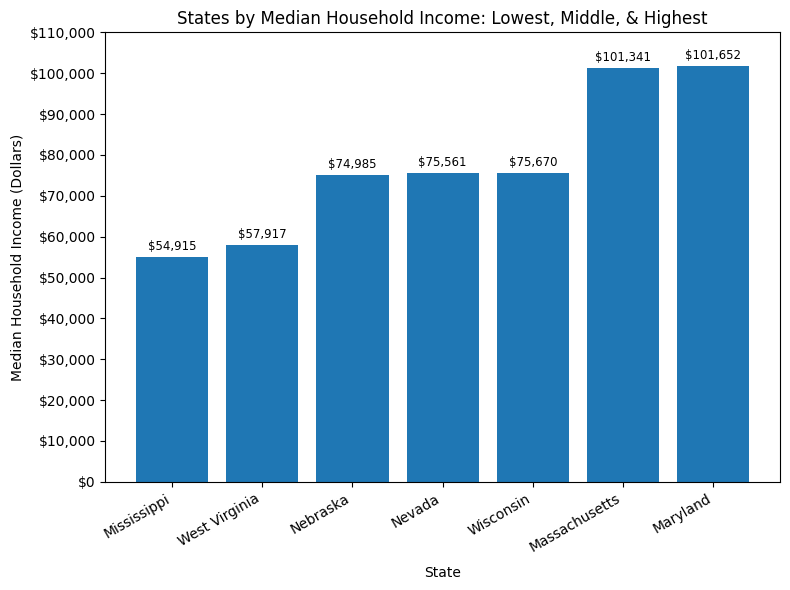

In [204]:
def dollar_format(x, pos):
    return f"${int(x):,}"  # adds $ and thousands comma

formatter = FuncFormatter(dollar_format)

plt.figure(figsize=(8,6))
bars = plt.bar(df_allstates_subset_inc["State"], df_allstates_subset_inc["Median Household Income (Dollars)"])
plt.xlabel("State", labelpad=8)
plt.ylabel("Median Household Income (Dollars)")
plt.title("States by Median Household Income: Lowest, Middle, & Highest")
plt.ylim(0, 110000)
plt.gca().yaxis.set_major_locator(MultipleLocator(10000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=30, fontsize=10, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${int(yval):,}", 
             ha='center', va='bottom', fontsize=8.5)

plt.tight_layout()
plt.show()

### Data Cleaning Continued ###

The rows containing metadata, notes, or references as opposed to county data are filtered out and removed by using `string-matching`.
The strings are separated by the `|` operator.
Dropped the "United States" aggregate to keep only state-level data

In [205]:
# drops rows that contain specific phrases such as "an ecosystem", 

df_renamed_allstates_edu = df_renamed_allstates_edu[
    ~df_renamed_allstates_edu['State'].str.contains(
        "For more information|An ecosystem|Median incomes over|Data not available|Notes|Demographic data provided|Suggested Citation",
        case=False, na=False
    )
]

df_allstates_subset_edu = df_renamed_allstates_edu[df_renamed_allstates_edu["State"] != "United States"]

df_allstates_subset_edu.head(53)

,State,FIPS,People (Education: At Least Bachelor's Degree) %,People (Education: At Least Bachelor's Degree),Rank within US (of 52 states)
1,West Virginia,54000.0,23.3,295541.0,52.0
2,Mississippi,28000.0,24.2,475997.0,51.0
3,Arkansas,5000.0,25.1,513221.0,50.0
4,Louisiana,22000.0,26.6,825794.0,49.0
5,Kentucky,21000.0,27.0,830856.0,48.0
6,Nevada,32000.0,27.4,601393.0,47.0
7,Alabama,1000.0,27.8,957081.0,45.0
8,Oklahoma,40000.0,27.8,733793.0,45.0
9,Indiana,18000.0,28.8,1313086.0,44.0
10,Puerto Rico,72001.0,29.1,702653.0,43.0


### Horizontal Bar Chart ###

Horizontal bar chart showing the percentage of people with at least a bachelor's degree in each selected state, with values labeled at the end of each bar.
Bar orientation: Horizontal (`barh`) to accommodate longer state names and improve readability.
X-axis: Represents the percentage of the population with a bachelor's degree or higher.
Custom scaling: X-axis limit is slightly extended (8% beyond the maximum value) to provide space for value labels.
Annotations: Exact percentages are displayed at the end of each bar for clarity.
Figure size: Increased vertically (`10x14`) to fit all states without overlapping labels.
Title and labels: Describes the metric and units.

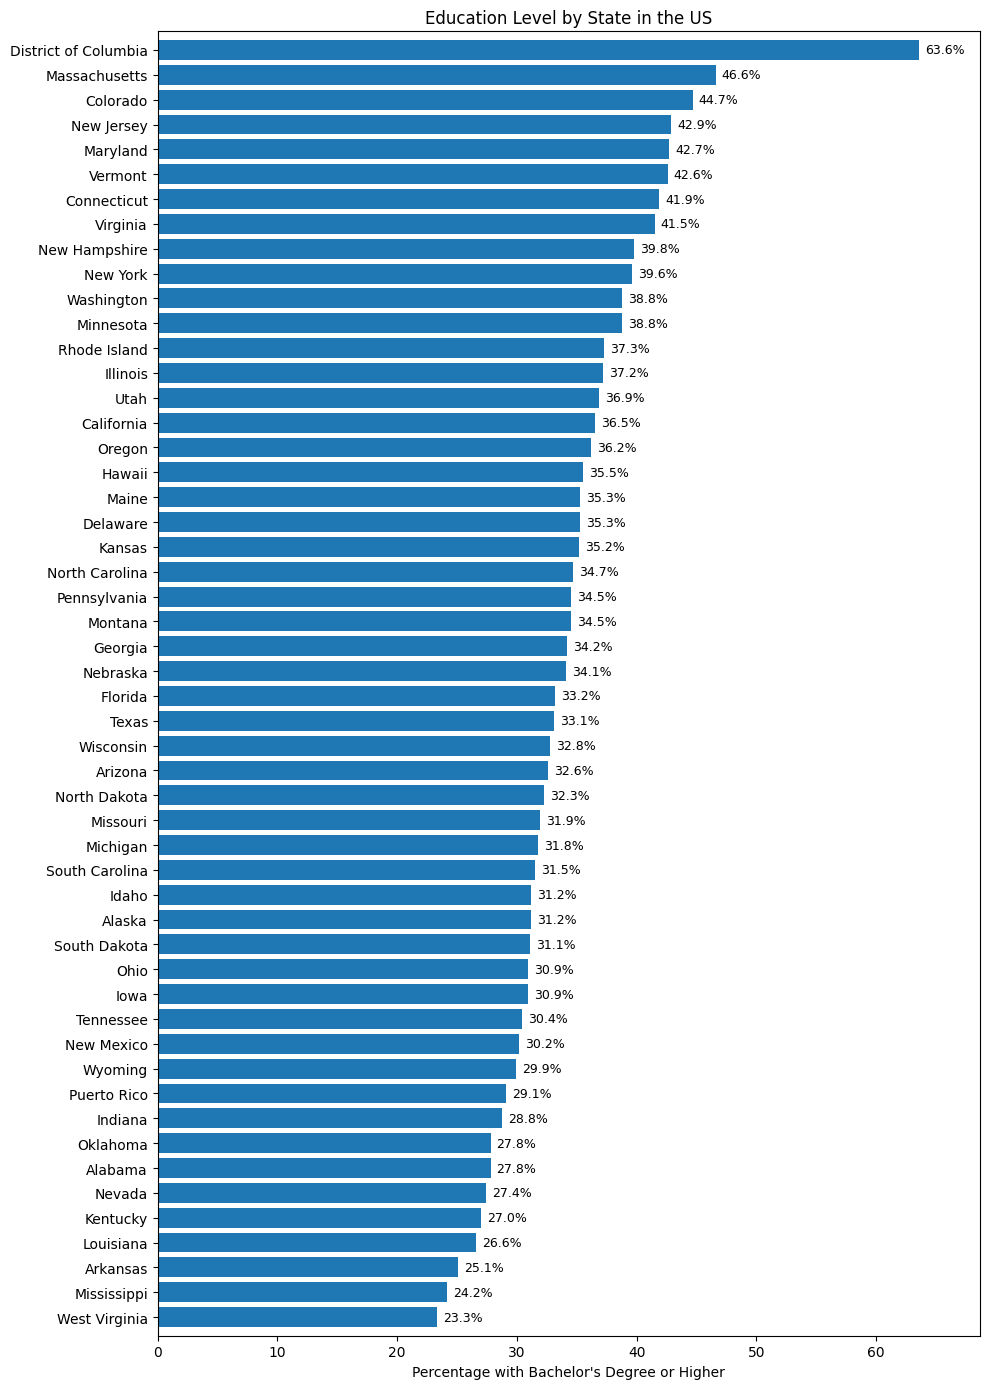

In [ ]:
plt.figure(figsize=(10,14))

bars = plt.barh(
    df_allstates_subset_edu["State"], 
    df_allstates_subset_edu["People (Education: At Least Bachelor's Degree) %"], 
    height=0.8
)

plt.xlabel("Percentage with Bachelor's Degree or Higher")
plt.title("Education Level by State in the US")
max_val = df_allstates_subset_edu["People (Education: At Least Bachelor's Degree) %"].max()
plt.xlim(0, max_val * 1.08)
plt.ylim(-0.75, len(df_allstates_subset_edu["State"]) - 1 + 0.75)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}%",
        ha='left',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()